In [1]:
%matplotlib notebook
%matplotlib inline
from math import pi, cos, sin
import matplotlib
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

<h1>Analiza poti vremenskega balona</h1>

V analizi bomo obravnavali potovanje vremenskega balona. Vremenski balon je napolnjen z lahkim plinom, in zaradi tega ima balon vzgonsko silo zaradi katere se začne dvigati v višave. Ko balon pride na neko višino se odpre ventil in lahek zrak zapusti notranjost balona. To povzroči da balon pade na tla. Da bi vremenarji pridobili dragocene senzorje za ponovičen poizskus morajo vsaj približno vedeti kam je balon padel v primeru da oddajnik neha delovati. V naši analizi želimo ugotoviti kam približno bo balon padel na tla.

# Začetni parametri

Analizirajmo najprej vse elemente ki sodelujejo v nasi analizi...

<img style="height:300px;float:right; margin: 20px" src="media/vremenski_balon.jpg">


## Balon


Za balon bomo vzeli standardni balon ki ga uporabljajo vremenoslovci za vertikalno analizo. Na podlagi vira vemo da je balon napolnjen z helijem.
Dimenzije balona bomo ocenili na podlagi slike najdene na spletu.

* $r = 0.1m$
* $m = 0.1 kg$
* $\rho_{He} = 0.1786 \frac{kg}{m^3}$


## Atmosfera

Za naše potrebe bomo hitrost vetra nastavili poljubno polarno vektorsko funkcijo ki se spreminja z visino. Ta funkcija je seveda aproksimacija linearnega povečevanja hitrosti z visino z poljubno polinomsko enacbo. Parametre bomo nastavili na vrednosti katere najbolje simulirajo realno dinamiko v atmosferi.

$$v = v0 + a_1h + a_2h^2 + a_3h^3$$
$$\alpha = \alpha0 + b_1h + b_2h^2 + b_3h^3$$

Definirajmo vse konstante za kreiranje vetrne simulacije. Definirajmo se funkcije katere opisujejo obnasanje vetra pri razlicnih visinah... Pri tem naj se zavedamo da je lahko za vetrno funkcijo lahko damo katere koli parametre polinomske funkcije saj bomo tako naso analizo naredili univerzalno.

### Vetrna aproximacija

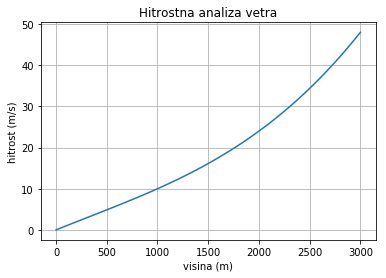

In [2]:
h = np.linspace(0, 3000, 100)
v0=0
a1=1e-2
a2=-1e-6
a3=1e-9

v = v0 + a1*h + a2*h**2 + a3*h**3

plt.plot(h, v)
plt.xlabel('visina (m)')
plt.ylabel('hitrost (m/s)')
plt.title('Hitrostna analiza vetra')
plt.grid()
plt.show()

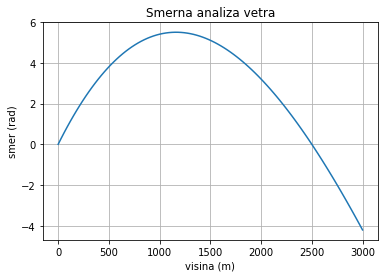

In [3]:
alpha0=0
b1=1e-2
b2=-5e-6
b3=4e-10

alpha = alpha0 + b1*h + b2*h**2 +  b3*h**3

plt.plot(h, alpha)
plt.xlabel('visina (m)')
plt.ylabel('smer (rad)')
plt.title('Smerna analiza vetra')
plt.grid()
plt.show()

### Barometricna formula

Poleg vetrerne funkcije potrebujemo se funkcijo gostote s katero bomo lahko izracunali vzgonsko silo ki deluje na balon...

$${\rho}=\rho_b \cdot \exp\left[\frac{-g \cdot M \cdot h}{R \cdot T_b}\right]$$

* $\rho$ = gostota zraka $(kg/m^3)$
* $T_b$ = standardna temperatura $(K)$
* $L$ = koelif. spremembe temperature z visino $(K/m)$
* $h$ = visina
* $R$ = splosna plinska konstanta $\left(8.314 \frac{J}{mol·K}\right)$
* $g$ = gravitacijski pospesek $\left(9.8 \frac{m}{s}\right)$
* $M$ = molska masa zraka $\left(0.0289 \frac{kg}{mol}\right)$

Vir: [Barometricna formula atmosfere](https://en.wikipedia.org/wiki/Barometric_formula)

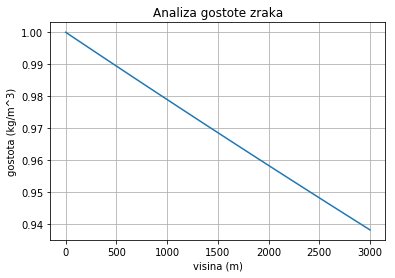

In [4]:
rho_b = 1.2
T_b = 293.15
L = 0.003
R = 8.314
g = 9.81
M = 0.029

rho = rho_b ** (-g * M * h / (R*T_b))

plt.plot(h, rho)
plt.xlabel('visina (m)')
plt.ylabel('gostota (kg/m^3)')
plt.title('Analiza gostote zraka')
plt.grid()
plt.show()

<p style="color:red">Iz grafa barometricne enacbe pa lahko zakljucimo da je spremembe gostote po visini kateri analiziramo potovanje balona zelo majhna, zato bomo radij kakor tudi gostoto aproksimirali z konstanto ki se nebo spreminjala. Hkrati bomo tudi gravitacijski pospesek aproksimirali z konstanto, saj se po visini kateri bomo analizirali potovanje balona ne spreminja veliko.</p>

# Visinska differencijalna enacba

Da bi ugotovili pot vetrnega balone go potuje skozi visino napisimo najprej analizo poti skozi visinske plasti atmosfere zaradi vzgona. Vemo da deluje na balon sila izspodrinjenega plina. Hkrati pa ker hitrost balona ni zanemarljiva se zaradi potovanja skozi zrak ustvari zracni upor katerega bomo dobili iz kvadratnega zakona upora.

$$F_{rez} = -F_{teze} + F_{vzgon} - F_{upora}$$
$ $
$$F_{teze} = mg$$
$ $
$$F_{vzgon} = \rho_{z} \cdot g\Delta V = \rho_{z} \cdot g\frac{4}{3} \pi  r^3$$
$ $
$$F_{upora} = \frac{1}{2}c_v\rho v^2S = \frac{1}{2}c_v\rho_z v^2 \pi r^2$$

Pri cemer naslednji spisek pojasnjuje obstoj simbolov v zgornjih enacbah...
* $m$ = skupna masa balona $(kg)$
* $g$ = gravitacijski pospesek $\left(9.81 m/s^2\right)$
* $\rho_z$ = gostota zraka $\left(1.2 kg/m^3\right)$
* $r$ = radij balona $(m)$
* $c_v$ = sferni koelificijent upora $(0.47)$
* $v$ = vertikalna hitrost balona $(m/s)$
* $S$ = precni presek objekta $m^2$

Izrazimo pospesek balona po vertikali ...

$$m\frac{dv}{dt} = -mg + \rho_{z} \cdot g \frac{4}{3}\pi r^3 - \frac{1}{2}c_v\rho_z v^2 \pi r^2$$

Uvedemo nove spremenljivke s katerimi bomo veliko lazje ustvarili differencijalne izracune...

$ $
$$0 = K_1 \frac{dv}{dt} + K_2 v^2 + K_3$$
$ $
$$K_1 = -m$$
$ $
$$K_2 = -\frac{1}{2}c_v\rho_z \pi r^2$$
$ $
$$K_3 = -mg + \frac{4}{3}\rho_zg\pi r^3 $$

## Simbolicno Resevanje

Najprej definirajmo konstante katere smo uvedli da smo poenostavili koncno diferencijalno enacbo za izracun funkcije visine...

In [5]:
import sympy as sym
sym.init_printing()

K1, K2, K3, t = sym.symbols("K1, K2, K3, t")

Cv = 0.47
g = 9.81
m = 0.1
r = 1
rho = 1.2

parametri = {
    K1: m,
    K2: -0.5 * Cv * rho * pi * (r ** 2),
    K3: -m*g + (4/3) * rho * g * pi * (r**3)
};
parametri

Definirajmo differencijalno enacbo za visino po ze znanem modelu in jo resimo z uporabo python knjiznice za simbolno racunanje...

$$K_1 \frac{dv}{dt} = K_2 v^2 + K_3$$

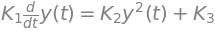

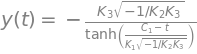

In [6]:

y = sym.Function("y")

diff = sym.Eq(
     K1 * y(t).diff(t), K2 * y(t)**2 + K3
); diff

display(diff)
resitev = sym.dsolve(diff, y(t))
display(resitev)

Poiscimo se zacetne pogoje s katerimi popravimo splosno resitev differencijalne enacbe. Za zacetne pogoje pa seveda velja...

$$y(0) = 0$$

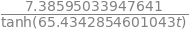

In [7]:
visina = resitev.args[1].subs(parametri).subs("C1", 0)
visina

In se koncno v zadnjem koraku vnesimo pripadajoce konstante za ogled koncne formule hitrosti vremenskega balona...

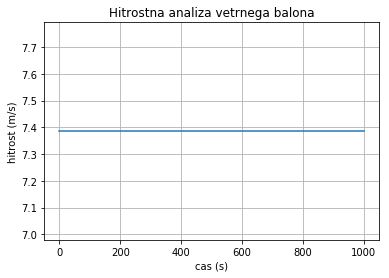

In [8]:
visina_balona = sym.lambdify(t, visina)
dt = np.linspace(0.3, 1000, 1000)
plt.plot(dt, visina_balona(dt))
plt.xlabel('cas (s)')
plt.ylabel('hitrost (m/s)')
plt.title('Hitrostna analiza vetrnega balona')
plt.grid()
plt.show()

## Preveritev resitve

V graficnem prikazu vidimo da se hitrost na hitro pospesi do konstantne hitrosti nato pa enakomerno potuje v visave. Ta izracun lahko preverimo za veljavnost tako da nastavimo ravnovesno enacbo ter hitrost primerjamo z izracunano differencijalno enacbo po dolgem casu...

$$F_{vzgona} = F_{teze} + F_{upora}$$

$$mg = \rho_{z} \cdot g \frac{4}{3}\pi r^3 - \frac{1}{2}c_v\rho_z v^2 \pi r^2$$

Iz zadnje enacbe lahko izrazimo hitrost ki je nasa konstanta po zelo dolgem casu $t$.

$$v = \left(\frac{2 \left(4 \pi g \rho r^3 - 3 g m\right)}{3\pi C_v \rho r}\right)^{1/2}$$

In [9]:
g = 9.81
rhoHE = 0.145
(2*(4*pi*g*rho*r**3 - 3*g*m)/(3*pi*Cv*rho*r))**0.5

Vidimo da je to tudi pravilna resitev katero smo dobili tudi preko diferencijalne enacbe, zato lahko zakljucimo da balon potuje po visini z enako hitrostjo.

# Analiza po visini

Zdaj pa dajmo se analizirati potovanje balona po vseh kordinatah. Spomnimo se da balon potuje z neko poljubno formulo...

$$v_{xy}(h) = v0 + a_1h + a_2h^2 + a_3h^3$$
$$\alpha(h) = \alpha0 + b_1h + b_2h^2 + b_3h^3$$
$$v_{y} = v_{const}$$

Iz teh enacb lahko sestavimo sistem vektorskih enacb, najprej sestavimo parametre.

$$\frac{dx}{dt} = v_{xy}(z(t))\cos{\left(\alpha(z(t))\right)}$$
$ $
$$\frac{dy}{dt} = v_{xy}(z(t))\sin{\left(\alpha(z(t))\right)}$$
$ $
$$\frac{dz}{dt} = v_{z} t$$

In [10]:
from scipy.integrate import solve_ivp
t = np.linspace(0, 200, 1000)

def z_eq(t, y):
    return 7.38*t

def Vxy_eq(t, y):
    v0=0
    a1=1e-2
    a2=-1e-6
    a3=1e-9
    h = z_eq(t, None)

    return v0 + a1*h + a2*h**2 + a3*h**3

def alfa_eq(t, y): 
    alfa0=0
    b1=1e-2
    b2=-5e-6
    b3=4e-10
    h = z_eq(t, None)
    
    return alfa0 + b1*h + b2*h**2 + b3 * h**3

def x_eq(t, y):
    Vxy = Vxy_eq(t, None)
    alfa = alfa_eq(t, None)
    return  Vxy* sin(alfa)

def y_eq(t, y):
    return Vxy_eq(t, None) * cos(alfa_eq(t, None))
    
resitev_z = solve_ivp(z_eq, t_span=(0, 200), y0=np.array([0, 0]), t_eval=t)
resitev_y = solve_ivp(y_eq, t_span=(0, 200), y0=np.array([0, 0]), t_eval=t)
resitev_x = solve_ivp(x_eq, t_span=(0, 200), y0=np.array([0, 0]), t_eval=t)

## Numericno resevanje

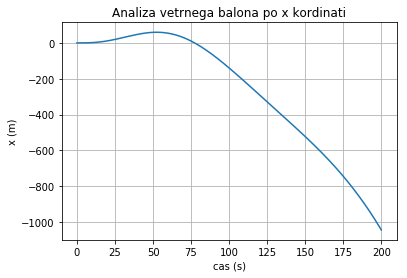

In [11]:
plt.plot(resitev_x.t, resitev_x.y[1])
plt.xlabel('cas (s)')
plt.ylabel('x (m)')
plt.title('Analiza vetrnega balona po x kordinati')
plt.grid()
plt.show()

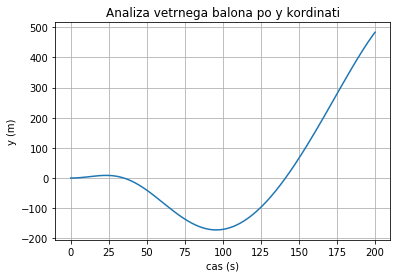

In [12]:
plt.plot(resitev_y.t, resitev_y.y[1])
plt.xlabel('cas (s)')
plt.ylabel('y (m)')
plt.title('Analiza vetrnega balona po y kordinati')
plt.grid()
plt.show()

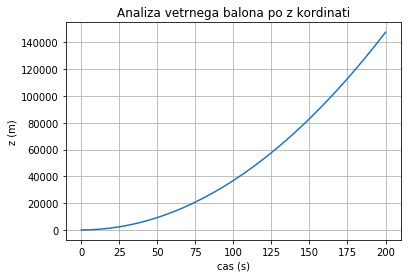

In [13]:
plt.plot(resitev_z.t, resitev_z.y[0])
plt.xlabel('cas (s)')
plt.ylabel('z (m)')
plt.title('Analiza vetrnega balona po z kordinati')
plt.grid()
plt.show()

# Odvajanje

Iskali bomo pospesek po y hitrostni komponenti balona

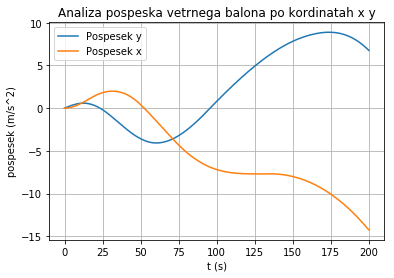

In [14]:
y_pospesek = np.gradient(resitev_y.y[1], t)
x_pospesek = np.gradient(resitev_x.y[1], t)

plt.plot(t, y_pospesek, label="Pospesek y")
plt.plot(t, x_pospesek, label="Pospesek x")
plt.ylabel('pospesek (m/s^2)')
plt.xlabel('t (s)')
plt.title('Analiza pospeska vetrnega balona po kordinatah x y')
plt.grid()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


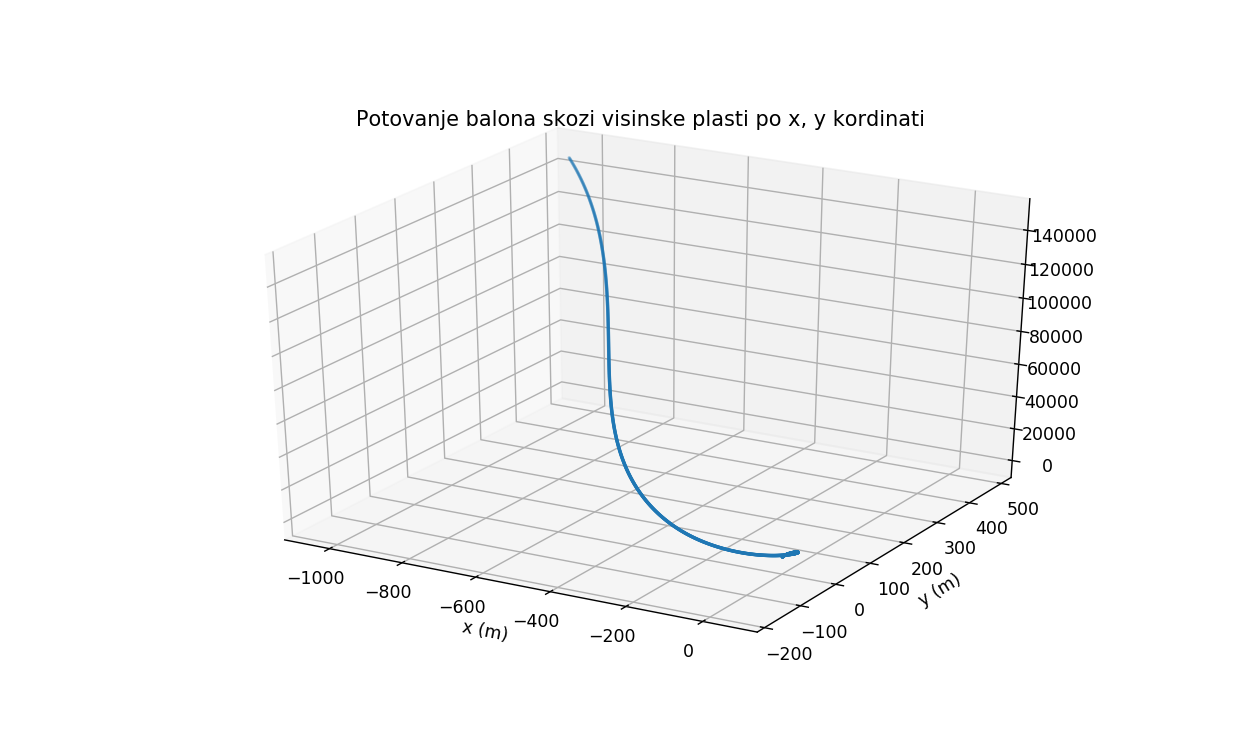

In [21]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')
ax.scatter(resitev_x.y[1], resitev_y.y[1], resitev_z.y[1], s=1)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title("Potovanje balona skozi visinske plasti po x, y kordinati")
plt.show()

# Iskanje nicel

Iskali bomo nicle po vetrnem kotu, nas zanima kdaj je smer vetra enaka kot na zacetku. Uporabili bomo funkcijo enako kot v predelu vetrna aproximacija...

$$\alpha = \alpha0 + b_1h + b_2h^2 + b_3h^3$$



In [16]:
%matplotlib notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy import optimize

alpha0=0
b1=1e-2
b2=-5e-6
b3=4e-10

def alpha(h):
    return alpha0 + b1*h + b2*h**2 +  b3*h**3

rezultat = optimize.bisect(alpha, 2000, 3000)
print(f"Najdena nicla: {round(rezultat, 2)} m")

Najdena nicla: 2500.0 m


# Aproximacija

V nasi analizi bi radi ugotovili kako se sirina listov iris setose povecuje z visino listov da bi lahko to formulo uporabljali v botaniki.

<img src="iris_setosa.png">

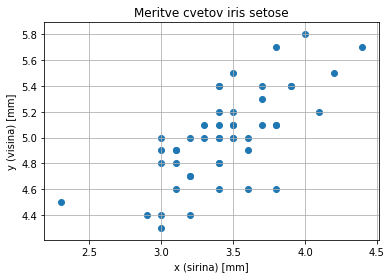

In [17]:

x, y = ([], [])
with open("iris_setosa.csv") as f:
    for line in f.readlines():
        xy = line.split("\t")
        x.append(float(xy[0]))
        y.append(float(xy[1]))
        
plt.scatter(x, y)
plt.xlabel('x (sirina) [mm]')
plt.ylabel('y (visina) [mm]')
plt.title('Meritve cvetov iris setose')
plt.grid()
plt.show()

Zdaj ko smo prebrali nase podatke jih dajmo aproksimirati z neko genericno polinomsko funkcijo...

In [18]:
koef = np.polyfit(x, y, deg=2)
print(f"Koelificijenti polinoma: {koef}")

Koelificijenti polinoma: [0.08862571 0.05215108 3.76651984]


Ustvarimo objekt polinoma...

In [19]:
polinom = np.poly1d(koef)
display(polinom)

poly1d([0.08862571, 0.05215108, 3.76651984])

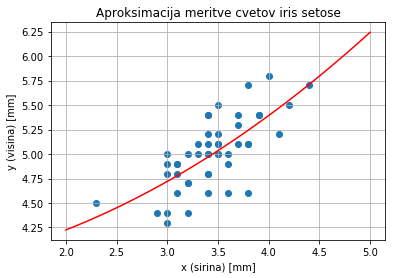

In [20]:
x_lin = np.linspace(2, 5, 100)
plt.scatter(x, y)
plt.plot(x_lin, polinom(x_lin), 'r')
plt.xlabel('x (sirina) [mm]')
plt.ylabel('y (visina) [mm]')
plt.title('Aproksimacija meritve cvetov iris setose')
plt.grid()
plt.show()

# Koncni komentar

V nasi analizi smo naredili simulacijo potovanja balona skozi visinske plasti v katerih se veter usmerja pod neko genericno funckcijo hitrosti in kota kateri smo priblizali z polinomsko funckcijo. V nasi simulaciji smo gledali visine v katerih se gostota zraka ne spremeni dosti. Dokazali smo da se hitrost balona skozi cas ne spreminja dosti po casu zato smo potovanje po visini priblizali z neko konstantno hitrostjo katera je odvisna samo od parametrov balona. Koncno smo resili numericne enacbe vetrnih funkcij in prikazali visinski graf kateri lepo prikazuje potovanje balona po visinskih plasteh.